# Bayesian inference
 
 Bayesian inference is a way of making statistical inferences in which the statistician assigns subjective probabilities to the distributions that could generate the data. In the Bayesian model, prior knowledge is understood as what you already know or believe about a situation based on your experience, expertise, or assumptions. On the other hand, data is a new evidence that you collect as a result of observations, experiments, or surveys.

Bayesian inference consists of three steps.

1. We choose a probability density function to model the parameter $θ$, that is, the a prior distribution $p(θ)$ . This is our best guess on the parameters before we get the data $X$.

2. Probability function - we choose a probability density function for $p(X|θ)$ . Essentially we are modeling how the data $X$ will look like with the given parameter $θ$ .

3. Posterior probability - we compute the posterior distribution $p(θ|X)$ and choose the $θ$ with the highest $p(θ|X)$ .

As a result, the posterior distribution becomes the new a prior distribution. The third step needs to be repeated each time new data arrives.

## Mathematical equation of Bayesian Inference

Bayesian inference uses a mathematical formula called Bayes' theorem to update the probability for a hypothesis as new data becomes available.

$$ 
{p(θ|X)} = \frac{p(X|\theta)\times p(\theta)} {p(X)} \tag{1}
$$

where  

$p(X|θ)$ - the likelihood, that is, the distribution of the observed data $X$ conditional on the parameter $θ$;

$p(θ)$ - the prior distribution;

$p(θ|X)$ - the posterior distribution.


Bayesian inference has 3 basic blocks and these are:

::::{grid}
:gutter: 3

:::{grid-item-card} The likelihood

The first building block of a  parametric  of Bayesian inference is likehood:

$$
    p(X|θ)
$$

When the parameters of the distribution generated by the data are equal to $ θ $, the probability density of $ X $.
:::

:::{grid-item-card} The prior

The second building block our inference is the prior:

$$ 
p(θ)
$$

The prior is the subjective probability density associated with the parameter $ θ $.
:::

:::{grid-item-card} The posterior

After observing data $X$, we operate Bayes' rule to update the prior about the parameter $θ$ (the formula is given below).

Suppose that we fit a model with parameters $w$ to the dataset $D = (X, y)$. According to the Bayes formula the posterior distribution:

<br>

$$
    p(w | X, y) \propto p(y | X, w) p(w) \tag{2}
$$

<br>
We are particularly interested in the posterior distribution because it allows us to make predictions.
<br>
<br>

:::
::::

```{dropdown} **Q**. How to calculate evidence?
![mem](https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Febdaebfa-8a7c-480e-a4c8-974bee54a498_500x672.jpeg)
```

### Probability distribution functions in dynamic graph

In this graph we want to visualize different types of distributions and how they change depending on the given values. This will give us a vision of how the distributions differ from each other. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets
from scipy.stats import uniform, norm, expon, bernoulli, binom, poisson

def generate_graph(distribution_type, parameter_1, parameter_2):
    x = np.linspace(0, 1, 1000) # theta

    if distribution_type == 'Uniform':
        # x = 1000 # theta
        y = uniform.pdf(x, loc=parameter_1, scale=parameter_2)
        title = f"Uniform distribution: start={parameter_1}, width{parameter_2}"
    elif distribution_type == 'Normal':
        y = norm.pdf(x, loc=parameter_1, scale=parameter_2)
        title = f"Normal distribution: mean of the distribution={parameter_1}, standard deviation={parameter_2}"
    elif distribution_type == 'Exponential':
        y = expon.pdf(x, loc=parameter_1, scale=parameter_2)
        title = f"Exponential distribution: loc={parameter_1}, 1/lambda={parameter_2}"
    elif distribution_type == 'Bernouli':
        y = bernoulli.pmf(x, p=parameter_1)
        title = f"Bernouli distribution: probability of success={parameter_1} (<= 1)"
    elif distribution_type == 'Binomial':
        y = binom.pmf(x, n=int(parameter_1), p=parameter_2)
        title = f"Binomial distribution: n={int(parameter_1)}, probability of success=={parameter_2} (<= 1)"
    elif distribution_type == 'Poisson':
        y = poisson.pmf(x, mu=int(parameter_1))
        title = f"Poisson distribution: lambda={int(parameter_1)}"
    else:
        return

    plt.figure(figsize=(6, 3))
    plt.plot(x, y, label=distribution_type)
    plt.title(title)
    plt.xlabel('Theta')
    plt.ylabel('')
    plt.legend()
    plt.grid(True)
    plt.show()

choose_dist_type = widgets.Dropdown(
    options=['Uniform', 'Normal', 'Exponential', 'Bernouli', 'Binomial', 'Poisson'],
    value='Uniform',
    description='Distribution type:'
)

parameter_1 = widgets.FloatSlider(value=0, min=0, max=10, step=0.1, description='Parameter 1')
parameter_2 = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='Parameter 2')


interact_plot = interact(
    generate_graph,
    distribution_type=choose_dist_type,
    parameter_1 = parameter_1,
    parameter_2 = parameter_2
)

interactive(children=(Dropdown(description='Distribution type:', options=('Uniform', 'Normal', 'Exponential', …

::::{caution}
Pay attention. The code may not run due to a Jupyter book feature, so try running the .ipynb file itself.
::::

## Conjugate distributions

In probability and statistics, if the prior and the posterior belong to the same parametric family (set of probability distributions that share a common mathematical form or structure characterized by a set of parameters), then the prior is considered conjugate for the likelihood.

$$
p(θ|x) = \frac{p(x|θ)p(θ)}{p(x)} = \frac{p(x|θ)p(θ)}{\int_{θ}^{} p(x|θ)p(θ)dθ} \tag{3}
$$

```{admonition} Definition
Let $Φ $ be a parametric family of probability distributions. A prior distribution $p(θ)$ belonging to $Φ $ is said to be conjugate for the likelihood $p(x|θ)$ if and only if, the resulting posterior distribution $p(θ|x)$ also belongs to $Φ $ .

Mathematically, this can be expressed as:

$$
p(θ|x) \in Φ \text{  if and only if  } p(θ) \in Φ 
$$

In symbols:

$$
p(θ|x) \in Φ \Leftrightarrow p(θ) \in Φ
$$

In simple words, when we use a conjugate prior, the updated posterior obtained through Bayesian updating process belongs to the same parametric family as the prior.

```

### The binomial likelihood and beta priors

The beta-binomial distribution refers to a Bayesian modeling framework that combines a binomial likelihood with a beta distribution as a prior, resulting in a beta distribution as the posterior.

````{admonition} Recall

The Binomial distribution represents the probability of obtaining a number of successes in a fixed number of independent trials, where each trial has a binary outcome (success/failure) with probability $p$ of success. The Beta distribution is a continuous probability distribution defined on the interval [0,1], often parametrized by two shape parameters, $ \alpha $ and $ \beta $.

````

$$
f(x | n, \alpha , \beta) = \int_{0}^{1} Bin(x|n,p)Beta(p|\alpha,\beta){ dp} = {\left(\begin{array}{c}n\\ x\end{array}\right)}{\frac{1}{B(\alpha, \beta)}}\int_{0}^{1} p^{x+\alpha-1} {(1-p)^{n-x+\beta-1}}dp
$$

$$
f(x | n, \alpha , \beta) = {\left(\begin{array}{c}n\\ x\end{array}\right)}{\frac{ B(x+\alpha, n-x+ \beta)}{B(\alpha, \beta)}}
$$

### Beta-binomial model

Let's break down an example using [English Premier League](https://www.kaggle.com/datasets/irkaal/english-premier-league-) result dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
import pandas as pd

Let's look at the data. The main columns that we'll work are **Season** and **FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)** 

In [3]:
df = pd.read_csv("dataset_for_bayes_inference/results.csv", encoding='latin-1')
df.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


We will select matches of Home Teams (local teams) from 2015 season to 2020 and try to observe new data which will be matches from 2020-2021 season

In [4]:
selected_matches = df.query("Season in ['2015-16', '2016-17','2017-18', '2018-19', '2019-20']")
selected_matches_number = len(selected_matches)
print("Seasons from 2015 to 2020: ",selected_matches_number)

Seasons from 2015 to 2020:  1900


As a prior belief will be a win rate of the selected matches

In [5]:
home_wins = len(selected_matches[selected_matches['FTR'] == 'H'])
home_win_rate = round(home_wins/selected_matches_number,2)
print("Win rate of the seasons 2015-20: ", home_win_rate)

Win rate of the seasons 2015-20:  0.46


$\alpha$ and $\beta$ positive parameters control the shape of the distribution. Prior parameters:

In [6]:
alpha_param = home_win_rate * selected_matches_number
beta_param = selected_matches_number - alpha_param

print('alpha: ', alpha_param, '\nbeta: ', beta_param)

alpha:  874.0 
beta:  1026.0


Selected matches from 2020 to 2021

In [7]:
selected_matches_20_21 = df.query("Season == '2020-21'")
selected_matches_20_21_num = len(selected_matches_20_21)

home_wins_20_21 = len(selected_matches_20_21[selected_matches_20_21['FTR'] == 'H'])
win_rate_20_21 = round(home_wins_20_21/selected_matches_20_21_num,2)

print(" Selected matches from 2020-21: ", selected_matches_20_21_num, "\n", "Win matches count: ", home_wins_20_21, "\n", "Win rate of the seasons 2020-21: ", win_rate_20_21)

 Selected matches from 2020-21:  380 
 Win matches count:  144 
 Win rate of the seasons 2020-21:  0.38


According to beta-binomial distribution, the posterior parameters are:

$$ \alpha’ = \alpha + y \tag{5}$$
$$ \beta’ = n - y + \beta \tag{6}$$



In [8]:
alpha_pos_param = alpha_param + home_wins_20_21
beta_pos_param = selected_matches_20_21_num - home_wins_20_21 + beta_param
print('posterior alpha: ', alpha_pos_param, '\nposterior beta: ', beta_pos_param)

posterior alpha:  1018.0 
posterior beta:  1262.0


Lets calculate prior, likelihood and posterior of our selected data

In [9]:
import plotly.graph_objects as go

def plot_show(theta, prior, likelihood, posterior, l_factor):
    plt.figure(figsize=(10, 6))

    plt.plot(theta, prior, label="prior")
    ''' 
    l_factor for scaling the likelihood curve to distinguish the 
    likelihood curve from the prior and posterior curves in the plot
    Because likelihood function typically has a smaller curve.
    But scaling the likelihood function isn't required by math.
    '''
    plt.plot(theta, l_factor * likelihood, label="likelihood")
    plt.plot(theta, posterior, label="posterior")

    plt.ylabel("y")
    plt.xlabel("x")
    plt.xlim([0, 1])
    plt.legend()
    plt.xticks(np.arange(0, 1, 0.1))
    plt.show()

def graph_plot(theta, prior, likelihood, posterior, l_factor):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=theta, y=prior, mode='lines', name='Prior'))
    fig.add_trace(go.Scatter(x=theta, y=l_factor * likelihood, mode='lines', name='Likelihood'))
    fig.add_trace(go.Scatter(x=theta, y=posterior, mode='lines', name='Posterior'))

    fig.update_layout(
        title="Prior, Likelihood, and Posterior",
        xaxis_title="Theta",
        yaxis_title="Density",
        xaxis=dict(tickvals=np.arange(0, 1.1, 0.1)),
    )

    fig.show()

In [10]:
n = selected_matches_20_21_num
y = home_wins_20_21

theta = np.linspace(0,1,1000) # parameter array represents a possible value of the parameter for the beta distribution

prior = beta.pdf(theta, alpha_param, beta_param)
likelihood = binom.pmf(y, n, theta) 
posterior = beta.pdf(theta, alpha_pos_param, beta_pos_param) 

The plot representation of the results:

In [11]:
graph_plot(theta, prior, likelihood, posterior, l_factor=900)

After seeing the graph we can observe that the blue line describes our prior belief which is more than 0.4 on x-axis (we already defined this value as 0.46), likelihood function shown as an orange curve has highest probability value less than 0.4, and posterior's green curve is around 0.45 after seeing our data from 2020 to 2021. <br> The posterior' value is less than our prior belief which means that **the probability changed** after observing the new data. Now our local teams have a winning probability of around 0.45.

### Uninformative value

What if we don't consider the prior belief of our data? On the previous example a prior belief was calculated from the matches between 2015-2020. New data were from 2020-2021. We know that during this period was COVID-19 and maybe this affected to our players. <br> <br> Calculating with minimal prior belief called **uninformative prior**. Uniformative prior has equal weights for all possible values of the parameter. This means that all values of the parameter are equally likely before we see any data.

In [12]:
alpha_param = 1
beta_param = 1

alpha_pos_param = alpha_param + y
beta_pos_param = n - y + beta_param

prior = beta.pdf(theta, alpha_param, beta_param)
likelihood = binom.pmf(y, n, theta) 
posterior = beta.pdf(theta, alpha_pos_param, beta_pos_param) 

graph_plot(theta, prior, likelihood, posterior, l_factor=300)

After observing our data in the graph we can see 3 lines. Our prior blue line is flat which means all values of the parameter are equally likely before seeing any data. The likelihood orange curve has a value around 0.4 (or less than 0.4). The same value can be observed in the posterior green curve but it is more spread out than the likelihood function.

### The normal likelihood and normal priors

When we considering a normal likelihood and a normal prior in Bayesian statistics, we're essentially dealing with a situation where both the likelihood and the prior distributions follow the normal (Gaussian) distribution. 

The Normal parametric family has two parameters - the mean $μ$ and the variance​ $σ^2$, so The Bayesian updating process with a normal likelihood and normal prior can be expressed as follows:
 
$$
p(μ|x) = \left(2 \pi \tau_n^2\right)^{-\frac{1}{2}} \exp{\left(-\frac{1}{2\tau_n^2} (μ-μ_n)^2\right)} \tag{7}
$$


where the mean equals to:

$$
μ_n = \left(\frac{n}{σ^2} + \frac{1}{\tau_0^2}\right)^{-1} \left[{\frac{n}{σ^2} \left(\frac{1}{n}\sum_{i=1}^n x_i\right)+ \frac{1}{\tau_0^2}μ_0}\right] \tag{8}
$$


and the prior variance is:

$$
\tau_n^2 = \left(\frac{n}{σ^2} + \frac{1}{\tau_0^2}\right)^{-1} \tag{9}
$$


#### Check question:
<span style="display:none" id="question_3">W3sicXVlc3Rpb24iOiAiUmVkIGxpbmVzID0gZGF0YSBpbiBvcmRlcjogMywgOSwgMTIuIEJsYWNrIGdyYXBoID0gcHJpb3IuIFdoaWNoIHBsb3QgaXMgdGhlIHBvc3RlcmlvciB0byBqdXN0IHRoZSBmaXJzdCBkYXRhIHZhbHVlPyIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiUGxvdCAxIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkNsb3NlLiBUaGUgcG9zdGVyaW9yIG11c3QgaGF2ZSBpdHMgbWVhbiBiZXR3ZWVuIDMgYW5kIHRoZSBtZWFuIG9mIHRoZSBibGFjayBwcmlvci4gICAgICAgICAgICAgICAgIFdlIGFsc28ga25vdyB0aGF0IHRoZSB2YXJpYW5jZSBvZiB0aGUgcG9zdGVyaW9yIGlzIGxlc3MgdGhhbiB0aGF0IG9mIHRoZSBwb3N0ZXJpb3IuICAgICAgICAgICAgICAgICAgQmV0d2VlbiB0aGUgcGxvdHMgMSBhbmQgMiBncmFwaHMgb25seSBwbG90IDIgaGFzIHNtYWxsZXIgdmFyaWFuY2UgdGhhbiB0aGUgcHJpb3IuIn0sIHsiYW5zd2VyIjogIlBsb3QgMiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIFRoZSBmaXJzdCBkYXRhIHZhbHVlIGlzIDMuIFRoZXJlZm9yZSB0aGUgcG9zdGVyaW9yIG11c3QgaGF2ZSBpdHMgICAgICAgICAgICAgICAgICAgICAgICAgIG1lYW4gYmV0d2VlbiAzIGFuZCB0aGUgbWVhbiBvZiB0aGUgYmxhY2sgcHJpb3IuIFRoZSBvbmx5IHBvc3NpYmlsaXRlcyBmb3IgICAgICAgICAgICAgICAgICAgICAgICAgIHRoaXMgYXJlIHBsb3RzIDEgYW5kIDIuIFdlIGFsc28ga25vdyB0aGF0IHRoZSB2YXJpYW5jZSBvZiB0aGUgcG9zdGVyaW9yIGlzICAgICAgICAgICAgICAgICAgICAgICAgICBsZXNzIHRoYW4gdGhhdCBvZiB0aGUgcG9zdGVyaW9yLiBCZXR3ZWVuIHRoZSBwbG90cyAxIGFuZCAyIGdyYXBocyBvbmx5IHBsb3QgICAgICAgICAgICAgICAgICAgICAgICAgICAyIGhhcyBzbWFsbGVyIHZhcmlhbmNlIHRoYW4gdGhlIHByaW9yLiJ9LCB7ImFuc3dlciI6ICJQbG90IDMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0In0sIHsiYW5zd2VyIjogIlBsb3QgNCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QifSwgeyJhbnN3ZXIiOiAiUGxvdCA1IiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdCJ9XX1d</span>

In [13]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm


x = np.linspace(0, 12, 100)
fig = go.Figure()

mean_plots = [4, 4, 6, 8, 8, 10.2]
variance_plots = [1.2, 0.4, 1, 0.7, 0.25, 0.25]
colors = ['orange', 'pink', 'black', 'green', 'yellow', 'blue']
labels = ['Plot 1', 'Plot 2', 'Prior', 'Plot 3', 'Plot 4', 'Plot 5']


for i in range(6):
    curve = norm.pdf(x, mean_plots[i], np.sqrt(variance_plots[i]))
    fig.add_trace(go.Scatter(x=x, y=curve, mode='lines', name=labels[i], line=dict(color=colors[i])))

for line in [3, 9, 12]:
    fig.add_shape(
        go.layout.Shape(
            type='line',
            x0=line,
            x1=line,
            y0=0,
            y1=0.5,
            xref='x',
            yref='paper',
            line=dict(color='red', width=2)
        )
    )


fig.update_layout(
    xaxis_title='Data',
    showlegend=True,
    width=800,
    height=500 
)
fig.show()

In [14]:
from jupyterquiz import display_quiz
display_quiz('#question_3')

<IPython.core.display.Javascript object>

<span style="display:none" id="question_4">W3sicXVlc3Rpb24iOiAiU3VwcG9zZSB0aGUgcHJpb3IgaGFzIGJlZW4gc2V0LiBMZXQgJHhfMSQgYW5kICR4XzIkIGJlIHR3byBzZXRzIG9mIGRhdGEuIFdoaWNoIG9mIHRoZSBmb2xsb3dpbmcgYXJlIHRydWU/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJJZiB0aGUgbGlrZWxpaG9vZHMgJHAoeF8xfFx1MDNiOCkkIGFuZCAkcCh4XzJ8XHUwM2I4KSQgYXJlIHRoZSBzYW1lIHRoZW4gdGhleSByZXN1bHQgaW4gdGhlIHNhbWUgcG9zdGVyaW9yLiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QuIn0sIHsiYW5zd2VyIjogIklmICR4XzEkIGFuZCAkeF8yJCByZXN1bHQgaW4gdGhlIHNhbWUgcG9zdGVyaW9yIHRoZW4gdGhlaXIgbGlrZWxpaG9vZCBmdW5jdGlvbnMgYXJlIHRoZSBzYW1lLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJXcm9uZyJ9LCB7ImFuc3dlciI6ICJJZiB0aGUgbGlrZWxpaG9vZHMgJHAoeF8xfFx1MDNiOCkkIGFuZCAkcCh4XzJ8XHUwM2I4KSQgYXJlIHByb3BvcnRpb25hbCAoYXMgZnVuY3Rpb25zIG9mICRcdTAzYjgkKSB0aGVuIHRoZXkgcmVzdWx0IGluIHRoZSBzYW1lIHBvc3Rlcmlvci4iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBUaGUgc2NhbGUgZmFjdG9ycyBkb25cdTIwMTl0IG1hdHRlci4gIn0sIHsiYW5zd2VyIjogIklmIHR3byBsaWtlbGlob29kIGZ1bmN0aW9ucyBhcmUgcHJvcG9ydGlvbmFsIHRoZW4gdGhleSBhcmUgZXF1YWwuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkZhbHNlIn1dfV0=</span>

### Normal-normal model 

At times, the normal distribution is also known as the "bell-shaped distribution" due to the resemblance of its probability density function graph to the shape of a bell.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Parameter values that will be used in process of coding. We used a normal distribution to represent the prior distribution and the observed data. The prior distribution is specified by the mean and standard deviation parameters. The observed data is a single value.
Prior information:

In [16]:
priorMean = 0
priorStd = 1

Likelihood information:

In [17]:
likelihoodMean = 3
likelihoodStd = 2

Data and generating a graph:

In [18]:
observedData = 4 
x = np.linspace(-5, 10, 1000)

priorDistribution = norm.pdf(x, loc=priorMean, scale=priorStd)
likelihoodDistribution = norm.pdf(x, loc=likelihoodMean, scale=likelihoodStd)

posteriorMean = (priorMean / priorStd**2 + observedData / likelihoodStd**2) / \
                 (1 / priorStd**2 + 1 / likelihoodStd**2)

posterior_std = np.sqrt(1 / (1 / priorStd**2 + 1 / likelihoodStd**2))
posteriorDistribution = norm.pdf(x, loc=posteriorMean, scale=posterior_std)

After that, creating and configuring graph:

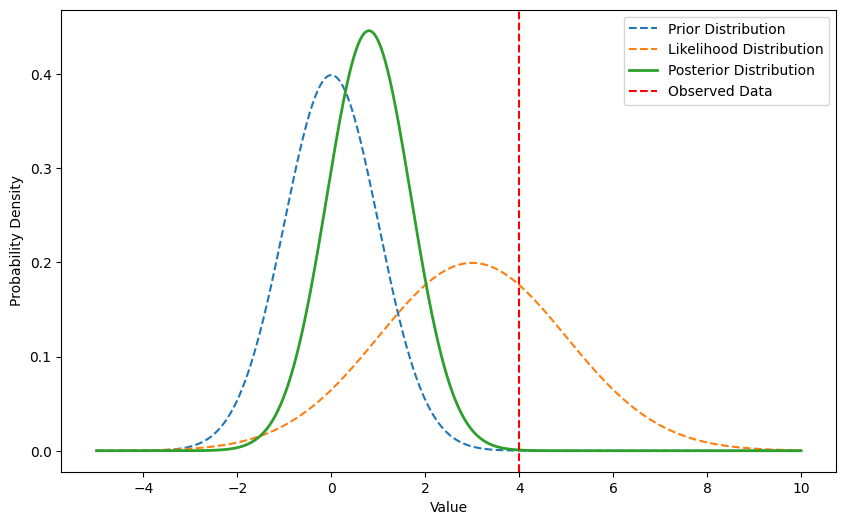

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(x, priorDistribution, label='Prior Distribution', linestyle='--')
plt.plot(x, likelihoodDistribution, label='Likelihood Distribution', linestyle='--')
plt.plot(x, posteriorDistribution, label='Posterior Distribution', linewidth=2)
plt.axvline(x=observedData, color='red', linestyle='--', label='Observed Data')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

The result is shown in graph <br>
The posterior distribution is centered around the mean value of the observed data. This is consistent with the fact that the observed data corroborates the prior assumption that the mean of the normal distribution is equal to the mean of the observed data.

## QUIZ section | Glossary

In [20]:
from jupytercards import display_flashcards
folder='files/'
display_flashcards(folder+'glossary.json')

<IPython.core.display.Javascript object>

In [21]:
display_quiz('#question_4')

<IPython.core.display.Javascript object>

::::{admonition} Some calculation
:class: dropdown

Theme: Normal-normal updating formulas

Suppose we have one data point $x = 2$ drawn from $N(θ, 3^2)$
Suppose $ θ $ is our parameter of interest with prior $ θ ∼ N(4, 2^2)$.
<br>
Problem - 1: Identify $µ_{prior}$, $σ_{prior}$, $σ$, $n$, and $\overline{x}$.
<br>
Problem - 2: Use the updating formulas to find the posterior.

`````{admonition} Tip
:class: tip, dropdown

$ a=\frac{1}{σ_{prior}^2} $ , $ b=\frac{n}{σ^2} $ , $ µ_{post} = \frac{aµ_{prior}+b\overline{x}}{a+b} $ , $ σ_{post}^2 = \frac{1}{a+b} $

`````

`````{admonition} Answer
:class: dropdown

Solution - 1:  $µ_{prior} = 4$, $σ_{prior} = 2$, $σ = 3$, $n = 1$, and $\overline{x} = 2$.

Solution - 2: We have $a = \frac{1}{4}$ , $b = \frac{1}{9}$ , $a+b = \frac{13}{36}$

<br>

$µ_{post} = \frac{\left( 1+\frac{2}{9}\right)}{\frac{13}{36}} = \frac{44}{13} = 3.3846$

<br>

$σ_{post}^2 = \frac{36}{13} = 2.7692$

<br>

***Answer***: The posterior pdf is $f(θ|x=2) \sim N(3.3846, 2.7692)$.
`````
::::
